In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, mean_absolute_error,mean_squared_error, median_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [4]:
veri=pd.read_csv('Datasets/DogrusalRegresyon.csv')

In [5]:
veri.head()

,Cinsiyet,Yas_Araligi,Bas_cevresi(cm^3),Beyin_agirligi(gr)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [6]:
X=veri['Bas_cevresi(cm^3)'].values

In [7]:
y=veri['Beyin_agirligi(gr)'].values

In [8]:
len(X)

237

In [9]:
X.shape

(237,)

In [10]:
X=X.reshape(len(X),1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=model.predict(X_test)

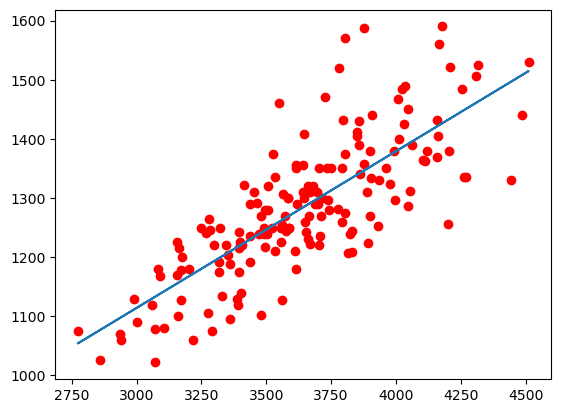

In [22]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train));

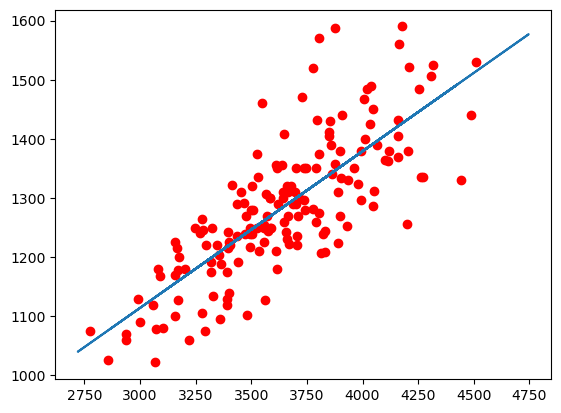

In [20]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_test, model.predict(X_test));

In [23]:
print(model.coef_)
print(model.intercept_)

[0.26481251]
319.8301925400709


In [25]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))
print(median_absolute_error(y_test, y_pred))

0.6993002108399291
55.18499937560606
4617.918994815832
53.33675115672645


## polinom regresyon

In [32]:
def fonk(x):
 return 10*np.sin(x/2) + x/7 +6

In [33]:
X=np.random.rand(100)*10

In [34]:
y=fonk(X) + 2*np.random.randn(*X.shape)

In [35]:
X=X.reshape(len(X),1)

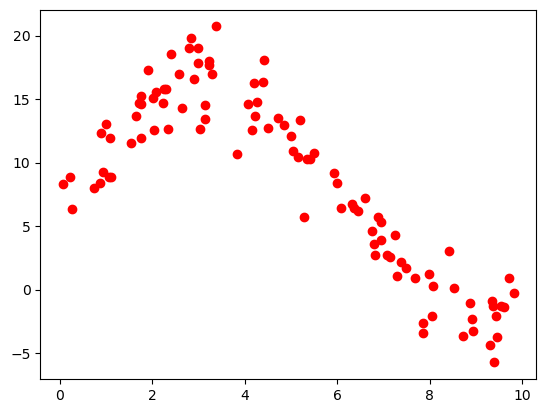

In [37]:
plt.scatter(X, y, color='red');

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [40]:
model_pol=PolynomialFeatures(degree=3)

In [41]:
X_pol=model_pol.fit_transform(X_train)

In [43]:
model_pol.fit(X_pol, y_train)

PolynomialFeatures(degree=3)

In [44]:
model2=LinearRegression()
model2.fit(X_pol, y_train)

LinearRegression()

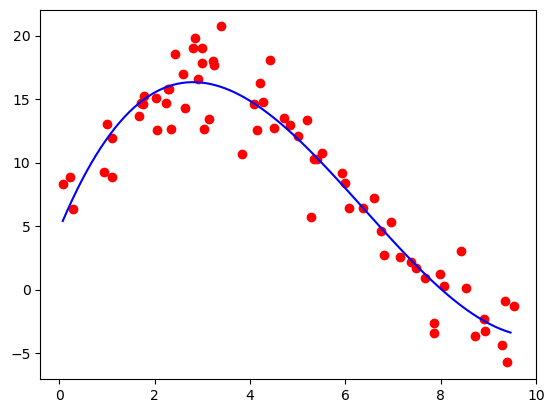

In [46]:
X_grid=np.arange(min(X_train), max(X_train), 0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X_train, y_train, color='red')
plt.plot(X_grid, model2.predict(model_pol.fit_transform(X_grid)), color='blue');

In [47]:
print(model2.intercept_)
print(model2.coef_)

4.787541316814101
[ 0.          9.07659543 -2.07145806  0.10791249]


In [48]:
y_pred=model2.predict(model_pol.fit_transform(X_test))

In [49]:
r2_score(y_test, y_pred)

0.9076771580683731